In [ ]:
Import Packages

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Import Dataset and view

In [2]:
anime = pd.read_csv('C:/Users/desja/python_course/datasets/anime.csv')
anime


,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
0,11013,Inu x Boku SS,Inu X Boku Secret Service,å¦–ç‹Ã—åƒ•SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",24.0,2012
1,2104,Seto no Hanayome,My Bride is a Mermaid,ç€¬æˆ¸ã®èŠ±å«,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (æ˜Žæ—¥ã¸ã®å…‰)"" b...",24.0,2007
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,ã—ã‚…ã”ã‚­ãƒ£ãƒ©ï¼ï¼ã©ãã£,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (ã¿ã‚“ãªã®ãŸã¾ã”)...","['#1: ""Rottara Rottara (ãƒ­ãƒƒã‚¿ãƒ© ãƒ­ãƒƒã‚¿...",24.0,2008
3,721,Princess Tutu,Princess Tutu,ãƒ—ãƒªãƒ³ã‚»ã‚¹ãƒãƒ¥ãƒãƒ¥,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,...,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ...",16.0,2002
4,12365,Bakuman. 3rd Season,Bakuman.,ãƒã‚¯ãƒžãƒ³ã€‚,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (ã‚‚ã—ã‚‚ã®è©±)"" b...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)...",24.0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6663,37405,Dokidoki Little Ooyasan,NaN,dokidokiã‚Šã¨ã‚‹å¤§å®¶ã•ã‚“,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Other,0,Currently Airing,...,NaN,[],NaN,NaN,Collaboration Works,Hentai,[],[],30.0,2018
6664,37886,Wo Shi Jiang Xiaobai (2018),I&#039;m Joybo OVA,æˆ‘æ˜¯æ±Ÿå°ç™½ å°å‰§åœº,Wo Shi Jiang Xiao Bai: Xiao Ju Chang,https://myanimelist.cdn-dena.com/images/anime/...,ONA,Original,1,Finished Airing,...,NaN,"{'Prequel': [{'mal_id': 36775, 'type': 'anime'...",NaN,NaN,2:10 Animation,"Slice of Life, Drama, Romance",[],[],0.0,2018
6665,37255,Genki Genki Non-tan: Obake Mura Meiro,NaN,ã’ã‚“ãã’ã‚“ããƒŽãƒ³ã‚¿ãƒ³ã€€ãŠã°ã‘ã‚€ã...,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Original,1,Finished Airing,...,NaN,"{'Prequel': [{'mal_id': 25619, 'type': 'anime'...",NaN,NaN,Polygon Pictures,"Music, Kids",[],[],35.0,2015
6666,35229,Mr. Men Little Miss,Mr. Men Little Miss,Mr. Men Little Miss / ãƒŸã‚¹ã‚¿ãƒ¼ãƒ¡ãƒ³ ãƒªãƒ...,NaN,https://myanimelist.cdn-dena.com/images/anime/...,ONA,Picture book,0,Currently Airing,...,NaN,[],NaN,NaN,Sanrio,Kids,[],[],2.0,2013


In [3]:
anime.columns.values

array(['anime_id', 'title', 'title_english', 'title_japanese',
       'title_synonyms', 'image_url', 'type', 'source', 'episodes',
       'status', 'airing', 'aired_string', 'aired', 'duration', 'rating',
       'score', 'scored_by', 'rank', 'popularity', 'members', 'favorites',
       'background', 'premiered', 'broadcast', 'related', 'producer',
       'licensor', 'studio', 'genre', 'opening_theme', 'ending_theme',
       'duration_min', 'aired_from_year'], dtype=object)

In [5]:
pd.set_option('display.max_columns', None) 
anime

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,aired_string,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
0,11013,Inu x Boku SS,Inu X Boku Secret Service,å¦–ç‹Ã—åƒ•SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,False,"Jan 13, 2012 to Mar 30, 2012","{'from': '2012-01-13', 'to': '2012-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,7.63,139250,1274.0,231,283882,2809,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",24.0,2012
1,2104,Seto no Hanayome,My Bride is a Mermaid,ç€¬æˆ¸ã®èŠ±å«,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,False,"Apr 2, 2007 to Oct 1, 2007","{'from': '2007-04-02', 'to': '2007-10-01'}",24 min. per ep.,PG-13 - Teens 13 or older,7.89,91206,727.0,366,204003,2579,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (æ˜Žæ—¥ã¸ã®å…‰)"" b...",24.0,2007
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,ã—ã‚…ã”ã‚­ãƒ£ãƒ©ï¼ï¼ã©ãã£,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,False,"Oct 4, 2008 to Sep 25, 2009","{'from': '2008-10-04', 'to': '2009-09-25'}",24 min. per ep.,PG - Children,7.55,37129,1508.0,1173,70127,802,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (ã¿ã‚“ãªã®ãŸã¾ã”)...","['#1: ""Rottara Rottara (ãƒ­ãƒƒã‚¿ãƒ© ãƒ­ãƒƒã‚¿...",24.0,2008
3,721,Princess Tutu,Princess Tutu,ãƒ—ãƒªãƒ³ã‚»ã‚¹ãƒãƒ¥ãƒãƒ¥,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,False,"Aug 16, 2002 to May 23, 2003","{'from': '2002-08-16', 'to': '2003-05-23'}",16 min. per ep.,PG-13 - Teens 13 or older,8.21,36501,307.0,916,93312,3344,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ...",16.0,2002
4,12365,Bakuman. 3rd Season,Bakuman.,ãƒã‚¯ãƒžãƒ³ã€‚,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,False,"Oct 6, 2012 to Mar 30, 2013","{'from': '2012-10-06', 'to': '2013-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,8.67,107767,50.0,426,182765,2082,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (ã‚‚ã—ã‚‚ã®è©±)"" b...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)...",24.0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6663,37405,Dokidoki Little Ooyasan,NaN,dokidokiã‚Šã¨ã‚‹å¤§å®¶ã•ã‚“,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Other,0,Currently Airing,True,"May 25, 2018 to ?","{'from': '2018-05-25', 'to': None}",30 min.,Rx - Hentai,9.52,33,NaN,10273,357,21,NaN,NaN,NaN,[],NaN,NaN,Collaboration Works,Hentai,[],[],30.0,2018
6664,37886,Wo Shi Jiang Xiaobai (2018),I&#039;m Joybo OVA,æˆ‘æ˜¯æ±Ÿå°ç™½ å°å‰§åœº,Wo Shi Jiang Xiao Bai: Xiao Ju Chang,https://myanimelist.cdn-dena.com/imag

#### Important Note
We do have some missing data, and some Japanese language characters in this set so need to do some data wrangling.

In [6]:
anime.dropna(inplace=True)
anime.head()

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,aired_string,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
0,11013,Inu x Boku SS,Inu X Boku Secret Service,å¦–ç‹Ã—åƒ•SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,False,"Jan 13, 2012 to Mar 30, 2012","{'from': '2012-01-13', 'to': '2012-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,7.63,139250,1274.0,231,283882,2809,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",24.0,2012
12,11123,Sekaiichi Hatsukoi 2,Sekai Ichi Hatsukoi - World&#039;s Greatest Fi...,ä¸–ç•Œä¸€åˆæ‹ 2,"Sekai-ichi Hatsukoi 2, Sekai&#039;ichi Hatsukoi 2",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,False,"Oct 8, 2011 to Dec 24, 2011","{'from': '2011-10-08', 'to': '2011-12-24'}",24 min. per ep.,PG-13 - Teens 13 or older,8.23,53285,288.0,945,89543,726,An event to show ep.1 of season 2 (along with ...,Fall 2011,Unknown,"{'Adaptation': [{'mal_id': 10309, 'type': 'man...","Lantis, Kadokawa Shoten, AT-X, KlockWorx",Funimation,Studio Deen,"Comedy, Drama, Romance, Shounen Ai","['""Sekai no Hate ni Kimi ga Itemo"" (ä¸–ç•Œã®æ...","['""Aikotoba"" (ã‚¢ã‚¤ã‚³ãƒˆãƒ) by Sakura Merry...",24.0,2011
18,210,Ranma Â½,Ranma Â½,ã‚‰ã‚“ã¾1/2,"Ranma 1/2, Ranma Â½ Nettou Hen",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,161,Finished Airing,False,"Apr 15, 1989 to Sep 25, 1992","{'from': '1989-04-15', 'to': '1992-09-25'}",24 min. per ep.,R+ - Mild Nudity,7.85,59911,802.0,623,134537,2742,The 2011 live-action adaptation is produced by...,Spring 1989,Unknown,"{'Adaptation': [{'mal_id': 23, 'type': 'manga'...","Shogakukan Productions, Kitty Films, Fuji TV, ...",Viz Media,Studio Deen,"Slice of Life, Comedy, Martial Arts, Fantasy","['#1: ""Jaja Uma ni Sasenai de"" by Etsuko Nishi...","['#1: ""Platonic Tsuranuite"" by Kaori Sakagami ...",24.0,1989
19,4224,Toradora!,Toradora!,ã¨ã‚‰ãƒ‰ãƒ©ï¼,Tiger X Dragon,https://myanimelist.cdn-dena.com/images/anime/...,TV,Light novel,25,Finished Airing,False,"Oct 2, 2008 to Mar 26, 2009","{'from': '2008-10-02', 'to': '2009-03-26'}",24 min. per ep.,PG-13 - Teens 13 or older,8.39,557898,174.0,13,910373,35322,Toradora! was selected as a recommended work b...,Fall 2008,Thursdays at 01:20 (JST),"{'Adaptation': [{'mal_id': 7149, 'type': 'mang...","Genco, Starchild Records, Magic Capsule, Yomiu...","NIS America, Inc.",J.C.Staff,"Slice of Life, Comedy, Romance, School","['#1: ""Pre-Parade (ãƒ—ãƒ¬ãƒ‘ãƒ¬ãƒ¼ãƒ‰)"" by Rie...","['#1: ""Vanilla Salt (ãƒãƒ‹ãƒ©ã‚½ãƒ«ãƒˆ)"" by Y...",24.0,2008
25,10800,Chihayafuru,Chihayafuru,ã¡ã¯ã‚„ãµã‚‹,Chihayafull,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,False,"Oct 5, 2011 to Mar 28, 2012","{'from': '2011-10-05', 'to': '2012-03-28'}",22 min. per ep.,PG-13 - Teens 13 or older,8.29,89081,246.0,348,213902,4524,Chihayafuru is the anime adaptation of the man...,Fall 2011,Wednesdays at Unknown,"{'Adaptation': [{'mal_id': 13245, 'type': 'man...","VAP, Nippon Television Network",Sentai Filmworks,Madhouse,"Drama, Game, Josei, School, Slice of Life, Sports","['""YOUTHFUL"" by 99RadioService']","['#1: ""Soshite Ima (ãã—ã¦ã„ã¾)"" by Asami...",22.0,2011


In [ ]:
## Part 1:
Is a Rating Score of 6.2 Different from the Mean in this Dataset?

#### Single Sample Test Assumptions - Creating a Histogram

<Axes: >

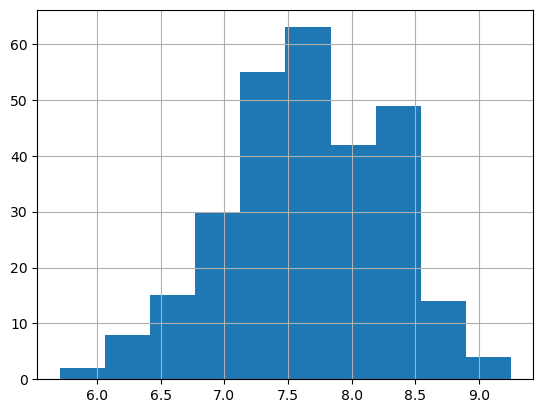

In [8]:
anime['score'].hist()

#### Output
While it's not a bell-shaped curve this histogram shows almost normal distribution 

#### Run the t-test Analysis

In [9]:
stats.ttest_1samp(anime['score'], 6.2)

TtestResult(statistic=39.40626105964426, pvalue=1.7928730897960434e-116, df=281)

#### Output/Results
The pvalue is significantly higher than 0.05 that means that the Rating Score of 6.2 is different from the Mean in this Dataset.
But to find out if it is higher or lower, I will need to examing the population mean.

In [10]:
anime.score.mean()

7.659645390070922

#### Output/Observation
This means that the Rating Score is lower than the average rating score of 7.65

## Part 2:
Does Anime that is Still Airing Differ in Popularity from Anime that is No Longer Airing?
Use the column names / variables status and popularity.

<Axes: >

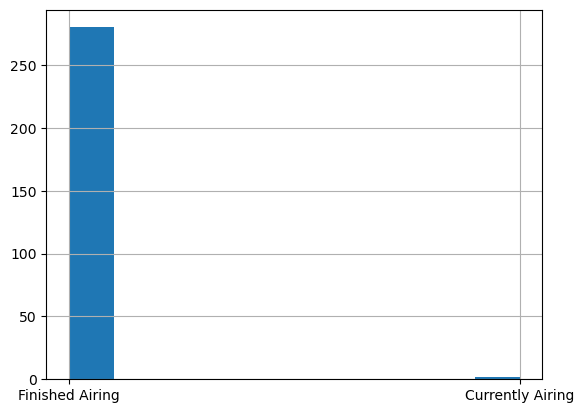

In [11]:
anime['status'].hist()

<Axes: >

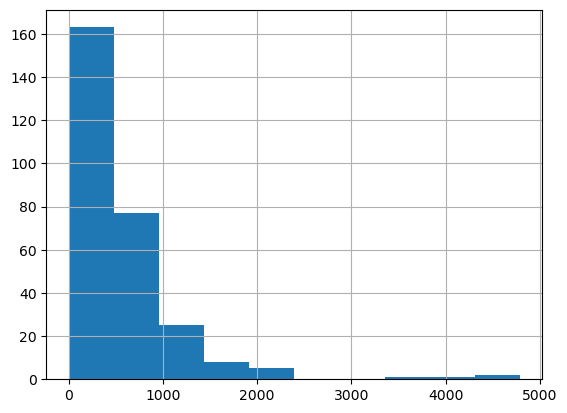

In [12]:
anime['popularity'].hist()

#### Recode Status Column

In [14]:
anime['status'].value_counts()

status
Finished Airing     280
Currently Airing      2
Name: count, dtype: int64

In [18]:
def recode_status (series): 
    if series == "Finished Airing":
        return 0
    if series == "Currently Airing": 
        return 1

In [24]:
anime['statusR'] = anime['status'].apply(recode_status)
anime.tail(50)

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,aired_string,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year,statusR
5312,2993,Rosario to Vampire,Rosario + Vampire,ãƒ­ã‚¶ãƒªã‚ªã¨ãƒãƒ³ãƒ‘ã‚¤ã‚¢,Rosario and Vampire,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,13,Finished Airing,False,"Jan 3, 2008 to Mar 27, 2008","{'from': '2008-01-03', 'to': '2008-03-27'}",25 min. per ep.,R+ - Mild Nudity,7.06,230899,3344.0,130,385405,3140,The source material&rsquo;s popularity has als...,Winter 2008,Unknown,"{'Adaptation': [{'mal_id': 894, 'type': 'manga...","GDH, Yomiko Advertising, Happinet Pictures, At...",Funimation,Gonzo,"Harem, Comedy, Romance, Ecchi, Vampire, Fantas...","['""COSMIC LOVE"" by Nana Mizuki']","['#1: ""COSMIC LOVE"" by Nana Mizuki (ep 1, 13)'...",25.0,2008,0
5374,18179,Yowamushi Pedal,Yowamushi Pedal,å¼±è™«ãƒšãƒ€ãƒ«,Yowapeda,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,38,Finished Airing,False,"Oct 8, 2013 to Jul 1, 2014","{'from': '2013-10-08', 'to': '2014-07-01'}",24 min. per ep.,PG-13 - Teens 13 or older,8.11,61303,430.0,670,125149,1895,Episode 1 was previewed at a screening in Toky...,Fall 2013,Unknown,"{'Adaptation': [{'mal_id': 23627, 'type': 'man...","TOHO animation, Akita Shoten",Discotek Media,TMS Entertainment,"Comedy, Sports, Drama, Shounen","['#1: ""Reclimb (ãƒªã‚¯ãƒ©ã‚¤ãƒ )"" by ROOKiEZ i...","['#1: ""Kaze wo Yobe (é¢¨ã‚’å‘¼ã¹)"" by Under G...",24.0,2013,0
5415,28979,To LOVE-Ru Darkness 2nd,To LOVE Ru Darkness 2,To LOVEã‚‹ -ã¨ã‚‰ã¶ã‚‹- ãƒ€ãƒ¼ã‚¯ãƒã‚¹2nd,To LOVE-Ru Trouble Darkness 2nd,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,False,"Jul 7, 2015 to Sep 29, 2015","{'from': '2015-07-07', 'to': '2015-09-29'}",23 min. per ep.,R+ - Mild Nudity,7.71,57412,1092.0,735,117398,657,Episode 1 was previewed at a screening at TOHO...,Summer 2015,Tuesdays at 00:00 (JST),"{'Adaptation': [{'mal_id': 22519, 'type': 'man...","TBS, Magic Capsule, Warner Bros., NBCUniversal...",Sentai Filmworks,Xebec,"Comedy, Ecchi, Harem, Romance, School, Sci-Fi,...","['""secret arms"" by Ray']","['""Gardens"" by Mami Kawada']",23.0,2015,0
5439,6114,Rainbow: Nisha Rokubou no Shichinin,Rainbow,RAINBOW äºŒèˆŽå…­æˆ¿ã®ä¸ƒäºº,Rainbow: Nisha Rokubou no Shichinin,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,False,"Apr 7, 2010 to Sep 29, 2010","{'from': '2010-04-07', 'to': '2010-09-29'}",22 min. per ep.,R - 17+ (violence & profanity),8.59,78226,72.0,384,196494,5199,FUNimation Entertainment simulcasted Rainbow: ...,Spring 2010,Unknown,"{'Adaptation': [{'mal_id': 7482, 'type': 'mang...","VAP, Nippon Television Network",Funimation,Madhouse,"Drama, Historical, Seinen, Thriller","['""We&#039;re not alone"" by coldrain']","['""A FAR-OFF DISTANCE"" by Galneryus']",22.0,2010,0
5448,22297,Fate/stay night: Unlimited Blade Works,Fate/stay night [Unlimited Blade Works],Fate/stay night [Unlimited Blade Works],"Fate/stay night (2014), Fate - Stay Night",https://myanimelist.cdn-dena.com/images/anime/...,TV,Visual novel,12,Finished Airing,False,"Oct 12, 2014 to Dec 28, 2014","{'from': '2014-10-12', 'to': '2014-12-28'}",28 min. per ep.,R - 17+ (violence & profanity),8.34,256555,198.0,108,420948,7860,Episode 1 was previewed at screenings in Tokyo...,Fall 2014,Sundays at 00:00 (JST),"{'Alternative version': [{'mal_id': 356, 'type...","Aniplex, Notes",Aniplex of America,ufotable,"Action, Supernatural, Magic, Fantasy","['""ideal white"" by Mashiro Ayano (eps 1-9, 11-...","['#1: ""believe"" by Kalafina (eps 1-11)', '#2: ...",28.0,2014,0
5454,26243,Owari no Seraph,Seraph of the End: Vampire Reign,çµ‚ã‚ã‚Šã®ã‚»ãƒ©ãƒ•,Seraph of the End,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,False,"Apr 4, 2015 to Jun 20, 2015","{'from': '2015-04-04', 't

In [25]:
stats.ttest_rel(anime['statusR'], anime['popularity'])

TtestResult(statistic=-14.625767678206008, pvalue=2.0858165531115504e-36, df=281)

In [ ]:
#### Output/Results
As the pvalue is not less than .05, it means there is no significant difference in popularity between anime that is 'Still Airing' and Anime that is 'No Longer Airing'

In [ ]:
## Part 3

Does the Source of the Anime Influence the Type of Anime?
Use the column source, recoded to be four levels, unique values or categories:

Manga
Book
Game
Listening
And use the column name / variable type.

In [26]:
anime['source'].value_counts()

source
Manga           117
Light novel      76
Original         43
Visual novel     14
Novel            10
Game              9
4-koma manga      8
Web manga         3
Other             1
Book              1
Name: count, dtype: int64

#### Note - Did not continue with Part 3
I went round the houses and made so many errors trying to recode this one and ended up just confusing myself. 
Will have to come back to it after submission.

anime['source'].value_counts()

## Part 4

How do the Variables about Popularity / Ranking Relate to Each Other?
Use the following variables:

score
scored_by
rank
popularity
members
favorites

In [3]:
print(anime.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6668 entries, 0 to 6667
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   anime_id         6668 non-null   int64  
 1   title            6668 non-null   object 
 2   title_english    3438 non-null   object 
 3   title_japanese   6663 non-null   object 
 4   title_synonyms   4481 non-null   object 
 5   image_url        6666 non-null   object 
 6   type             6668 non-null   object 
 7   source           6668 non-null   object 
 8   episodes         6668 non-null   int64  
 9   status           6668 non-null   object 
 10  airing           6668 non-null   bool   
 11  aired_string     6668 non-null   object 
 12  aired            6668 non-null   object 
 13  duration         6668 non-null   object 
 14  rating           6586 non-null   object 
 15  score            6668 non-null   float64
 16  scored_by        6668 non-null   int64  
 17  rank          

#### Note: Looking at the number of columns I would need to drop, I decided against using the .drop function and filtered to pick the columns that had numeric data. 

In [4]:
anime3 = anime.filter(['anime_id', 'episodes', 'score', 'scored_by', 'rank', 'popularity', 'members', 'favorites', 'duration_min','aired_from_year' ])
anime3.head()

,anime_id,episodes,score,scored_by,rank,popularity,members,favorites,duration_min,aired_from_year
0,11013,12,7.63,139250,1274.0,231,283882,2809,24.0,2012
1,2104,26,7.89,91206,727.0,366,204003,2579,24.0,2007
2,5262,51,7.55,37129,1508.0,1173,70127,802,24.0,2008
3,721,38,8.21,36501,307.0,916,93312,3344,16.0,2002
4,12365,25,8.67,107767,50.0,426,182765,2082,24.0,2012


In [5]:
anime3['popularity'].corr(anime['rank'])

0.7773024303272645

#### Output/Results
Based on this results there is a strong correlation between popularity and ranking. The correlation is also positive which means that the more popular the higher the ranking and vice versa.

#### Create a Correlation Matrix

In [7]:
anime3.corr(method='pearson')

,anime_id,episodes,score,scored_by,rank,popularity,members,favorites,duration_min,aired_from_year
anime_id,1.000000,-0.109610,-0.223733,-0.046057,0.274671,0.205813,-0.032301,-0.054066,-0.205838,0.623290
episodes,-0.109610,1.000000,0.076875,0.068544,-0.049064,-0.009545,0.079572,0.106804,-0.105711,-0.147920
score,-0.223733,0.076875,1.000000,0.381926,-0.898747,-0.688492,0.415626,0.256094,0.298989,0.042159
scored_by,-0.046057,0.068544,0.381926,1.000000,-0.356686,-0.425719,0.987107,0.793949,0.046203,0.110892
rank,0.274671,-0.049064,-0.898747,-0.356686,1.000000,0.777302,-0.391524,-0.208503,-0.294528,-0.063543
popularity,0.205813,-0.009545,-0.688492,-0.425719,0.777302,1.000000,-0.474798,-0.210745,-0.159596,-0.236951
members,-0.032301,0.079572,0.415626,0.987107,-0.391524,-0.474798,1.000000,0.781565,0.039457,0.135725
favorites,-0.054066,0.106804,0.256094,0.793949,-0.208503,-0.210745,0.781565,1.000000,0.002669,0.031254
duration_min,-0.205838,-0.105711,0.298989,0.046203,-0.294528,-0.159596,0.039457,0.002669,1.000000,-0.183812
aired_from_year,0.623290,-0.147920,0.042159,0.110892,-0.063543,-0.236951,0.135725,0.031254,-0.183812,1.000000


#### Visualize the Matrix

In [8]:
anime3.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,anime_id,episodes,score,scored_by,rank,popularity,members,favorites,duration_min,aired_from_year
anime_id,1.0,-0.11,-0.22,-0.046,0.27,0.21,-0.032,-0.054,-0.21,0.62
episodes,-0.11,1.0,0.077,0.069,-0.049,-0.0095,0.08,0.11,-0.11,-0.15
score,-0.22,0.077,1.0,0.38,-0.9,-0.69,0.42,0.26,0.3,0.042
scored_by,-0.046,0.069,0.38,1.0,-0.36,-0.43,0.99,0.79,0.046,0.11
rank,0.27,-0.049,-0.9,-0.36,1.0,0.78,-0.39,-0.21,-0.29,-0.064
popularity,0.21,-0.0095,-0.69,-0.43,0.78,1.0,-0.47,-0.21,-0.16,-0.24
members,-0.032,0.08,0.42,0.99,-0.39,-0.47,1.0,0.78,0.039,0.14
favorites,-0.054,0.11,0.26,0.79,-0.21,-0.21,0.78,1.0,0.0027,0.031
duration_min,-0.21,-0.11,0.3,0.046,-0.29,-0.16,0.039,0.0027,1.0,-0.18
aired_from_year,0.62,-0.15,0.042,0.11,-0.064,-0.24,0.14,0.031,-0.18,1.0


#### Create a Heatmap Using Seaborn

#### Interpretation

score is correlated with
- scored_by
- members 
- favorites
- duration

scored_by is correlated with
- score
- members (strongest correlation)
- favorites

rank and popularity are are strongly correlated with each other

members is correlated with
- score
- scored_by
- favourites (strongest correlation)

favorites is correlated with
- score (strong correlation)
- scored_by (strong correlation)
- members

<Axes: >

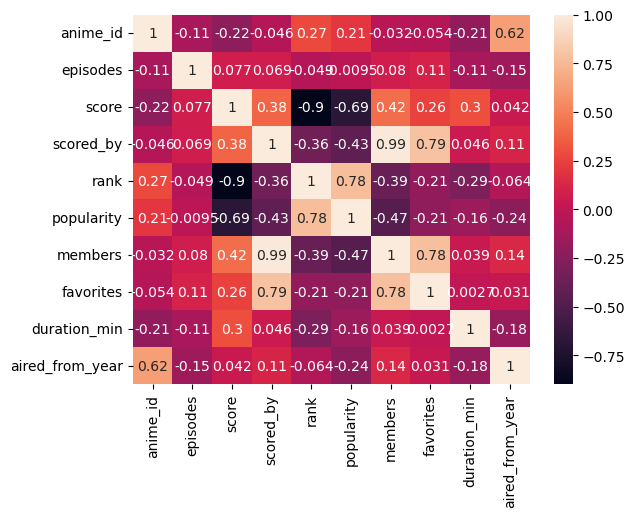

In [9]:
sns.heatmap(anime3.corr(), annot=True)